<a href="https://colab.research.google.com/github/Zrmikstri/CS115-YOLOv3/blob/main/YOLOv3_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv3 CS115.M13

Thành viên nhóm bao gồm:


*   Đào Trần Anh Tuấn     (20522107)
*   Phạm Trần Anh Tiên    (20522012)
*   Trần Phú Vinh         (20522161)

Giảng viên: Lương Ngọc Hoàng

# Cài đặt

Tụi em sử dụng phiên bản YOLOv3 của ultralytic cho việc phân loại trên hình ảnh và video.

In [1]:
!git clone https://github.com/ultralytics/yolov3  # clone
!git clone 'https://github.com/Zrmikstri/CS115-YOLOv3.git' #để lấy cái file demo của nhóm em
%cd yolov3
%pip install -qr requirements.txt  # install

import torch
from yolov3 import utils
display = utils.notebook_init()  # checks

YOLOv3 🚀 v9.6.0-5-g9d0e1cf torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅


# Giới thiệu

Ta có thể dùng file `detect.py` để chạy mô hình trên nhiều nguồn khác nhau. Kết quả được lưu vào `runs/detect`.

Một số nguồn có thể sử dụng như:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

Ngoài ra, ta còn thể truyền vào nhiều parameter khác nhau để có thể dễ dàng trực quan hóa kết quả.

```shell
        --imgsz 640 #kích thước input
        --conf-thres 0.25,  # ngưỡng giá trị confidence
        --iou-thres 0.45,  # ngưỡng giá trị NMS IOU 
        --max-det 1000,  # số detection của mỗi bức ảnh

        --visualize False,  # trực quan hóa kết quả khi mô hình thực hiện các bước dự đoán
        --line-thickness 3,  # độ dày của viền bounding box
        --hide-labels False,  # ẩn label
        --hide-conf  # ẩn confidence

```

detect: weights=['yolov3.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=True, half=False, dnn=False
YOLOv3 🚀 v9.6.0-5-g9d0e1cf torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

100% 119M/119M [00:01<00:00, 90.2MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 1 sports ball, Done. (0.146s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 3 ties, Done. (0.114s)
Speed: 0.5ms pre-process, 129.8ms inference, 21.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


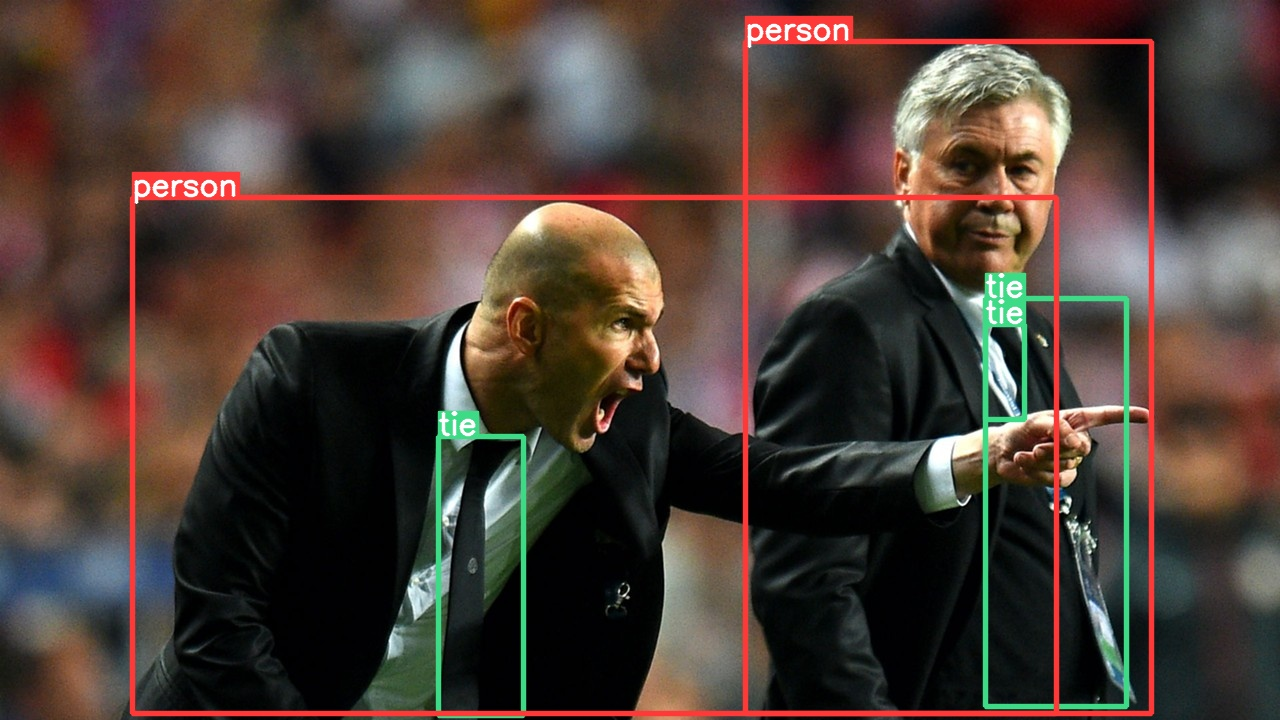

In [2]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images --hide-conf 
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

In [ ]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.05 --line-thickness 1 --max-det 2000 --hide-conf  --source /content/CS115-YOLOv3/Demo.mp4  

In [4]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "/content/yolov3/runs/detect/exp2/Demo.mp4"

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)
